In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_pacf

## Data Preprocessing

In [2]:
data = pd.read_csv('amazon_stock_data_with_details.csv')
data['Date'] = pd.to_datetime(data['Date'])
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Upper_Band,Lower_Band
0,2020-10-15,164.600494,167.794006,164.000000,166.932495,166.932495,104468000,161.061539,127.475924,63.334779,173.154703,144.515496
1,2020-10-16,168.161499,169.983002,158.000000,163.635498,163.635498,129488000,161.109249,127.819599,55.480376,173.096381,146.162818
2,2020-10-19,164.980499,166.449997,159.636993,160.360504,160.360504,104472000,161.148999,128.152659,53.327993,172.555240,147.937660
3,2020-10-20,161.113998,163.300003,159.600494,160.850494,160.850494,90194000,161.217849,128.481192,53.622665,172.646160,148.286840
4,2020-10-21,160.625000,161.694000,158.000000,159.246994,159.246994,91854000,161.322119,128.800712,47.986552,172.094424,149.763975


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50',
       'SMA_200', 'RSI', 'Upper_Band', 'Lower_Band'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,848.0,1.408004e+02,2.694243e+01,8.280000e+01,1.189500e+02,1.468600e+02,1.637723e+02,1.872000e+02
High,848.0,1.425575e+02,2.692206e+01,8.348000e+01,1.215225e+02,1.485550e+02,1.653197e+02,1.886540e+02
Low,848.0,1.389375e+02,2.691461e+01,8.143000e+01,1.165125e+02,1.447050e+02,1.618367e+02,1.848395e+02
Close,848.0,1.407515e+02,2.690136e+01,8.182000e+01,1.197575e+02,1.468800e+02,1.635352e+02,1.865705e+02
Adj Close,848.0,1.407515e+02,2.690136e+01,8.182000e+01,1.197575e+02,1.468800e+02,1.635352e+02,1.865705e+02
Volume,848.0,6.784855e+07,2.791809e+07,2.237840e+07,4.950635e+07,6.078300e+07,7.651132e+07,2.726620e+08
SMA_50,848.0,1.406088e+02,2.547508e+01,9.054680e+01,1.210835e+02,1.480413e+02,1.611510e+02,1.738487e+02
SMA_200,848.0,1.400971e+02,2.242994e+01,1.042010e+02,1.187010e+02,1.424666e+02,1.616821e+02,1.697447e+02
RSI,848.0,5.137730e+01,1.589125e+01,1.352437e+01,3.857039e+01,5.269645e+01,6.310919e+01,9.092583e+01
Upper_Band,848.0,1.506034e+02,2.663396e+01,9.218634e+01,1.294876e+02,1.581860e+02,1.730416e+02,1.924661e+02


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50',
       'SMA_200', 'RSI', 'Upper_Band', 'Lower_Band'],
      dtype='object')

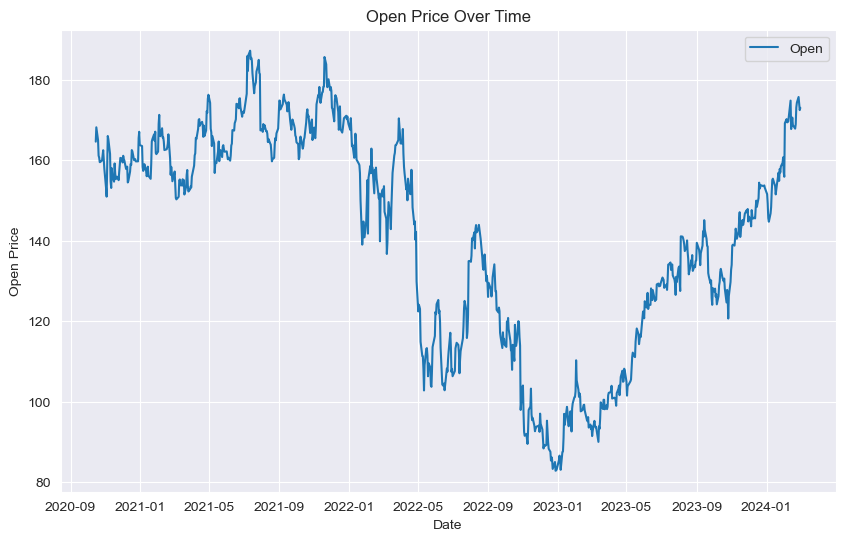

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

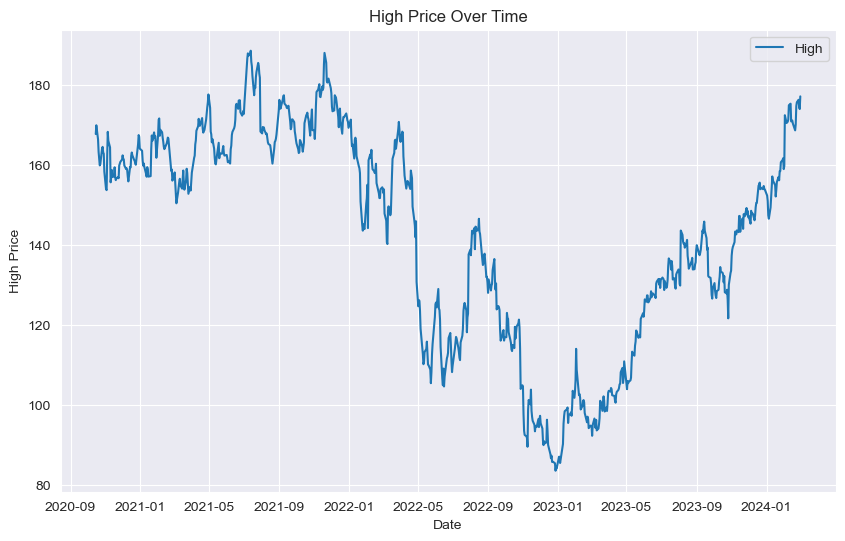

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='High')  # Plotting 'High' price instead of 'Open'
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.grid(True)
plt.show()


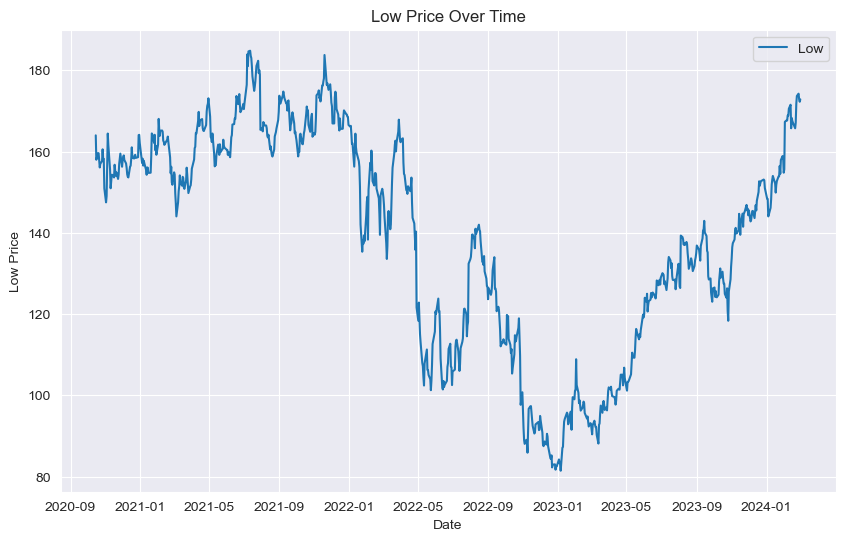

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Low'], label='Low')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.grid(True)
plt.show()


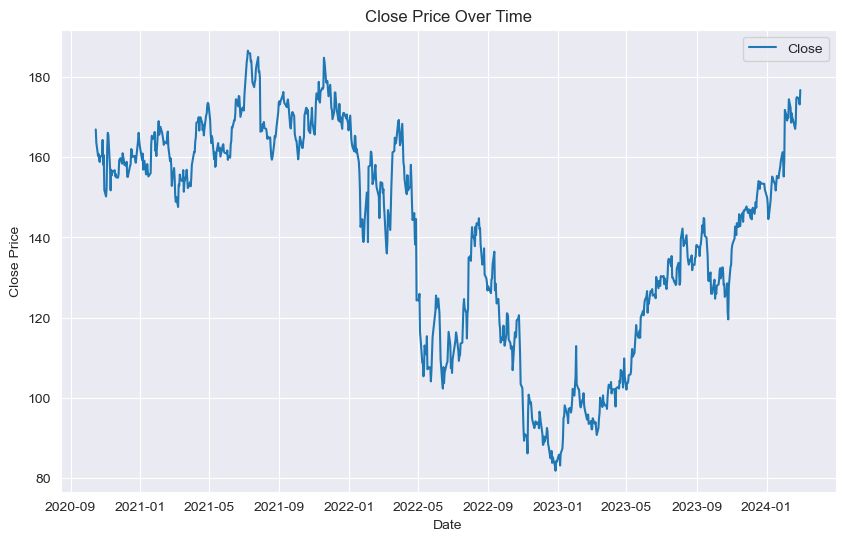

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


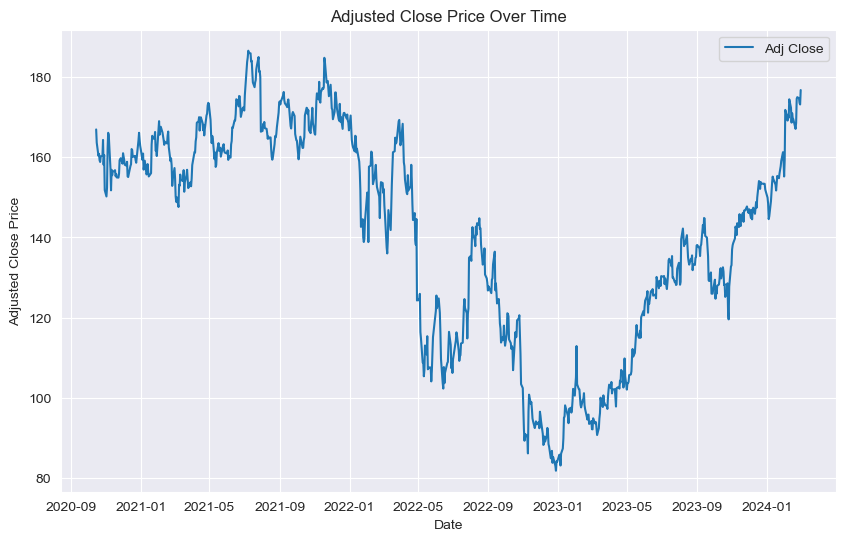

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


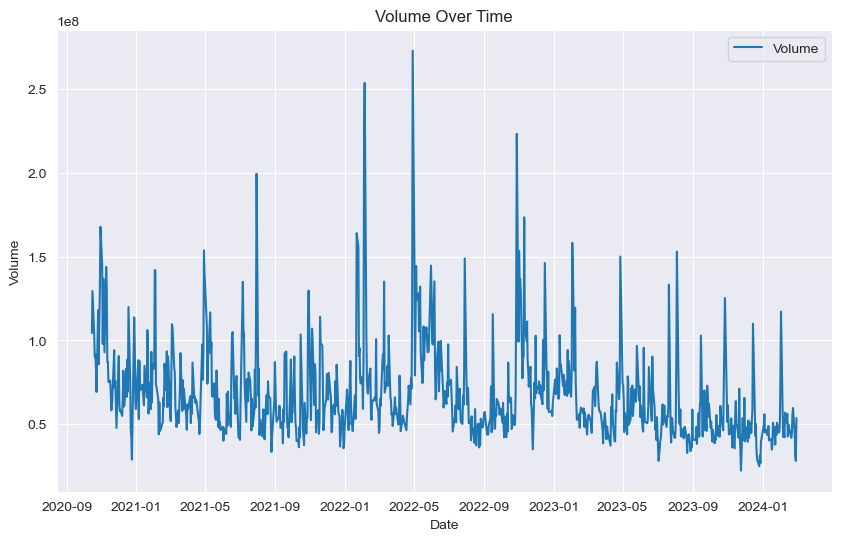

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


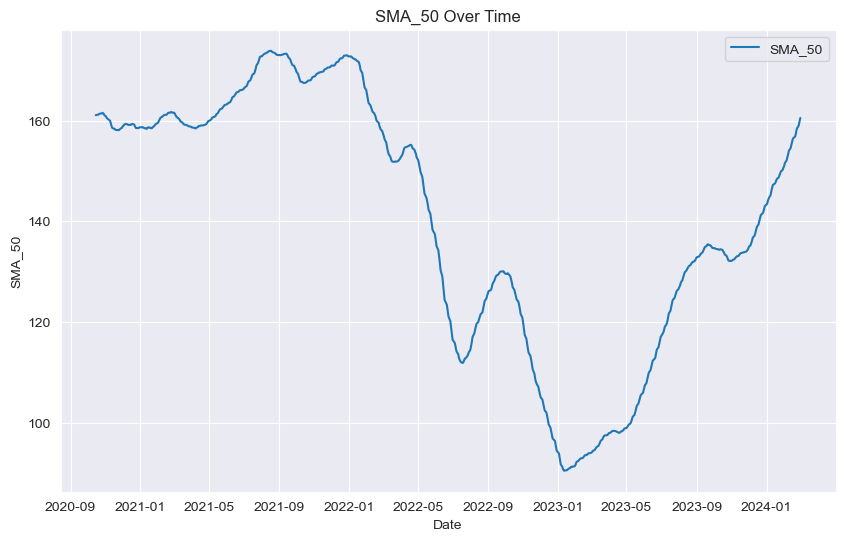

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SMA_50'], label='SMA_50')
plt.title('SMA_50 Over Time')
plt.xlabel('Date')
plt.ylabel('SMA_50')
plt.legend()
plt.grid(True)
plt.show()


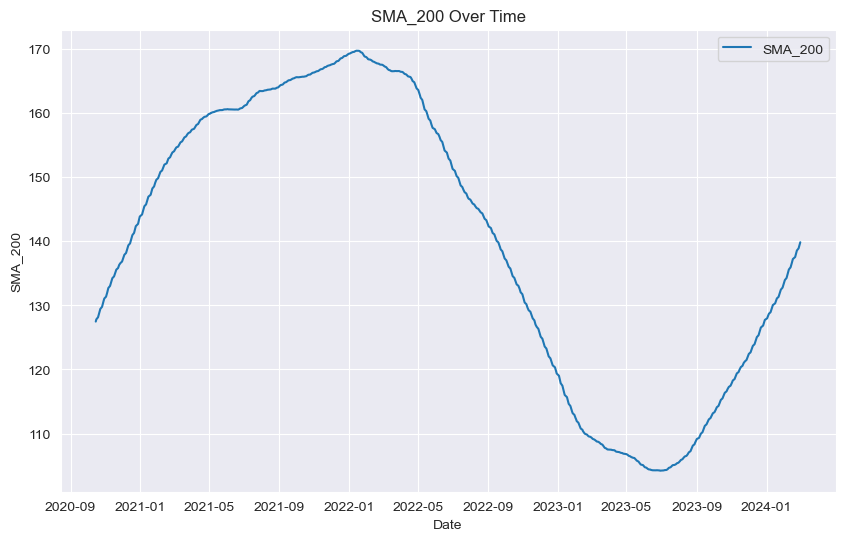

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SMA_200'], label='SMA_200')
plt.title('SMA_200 Over Time')
plt.xlabel('Date')
plt.ylabel('SMA_200')
plt.legend()
plt.grid(True)
plt.show()


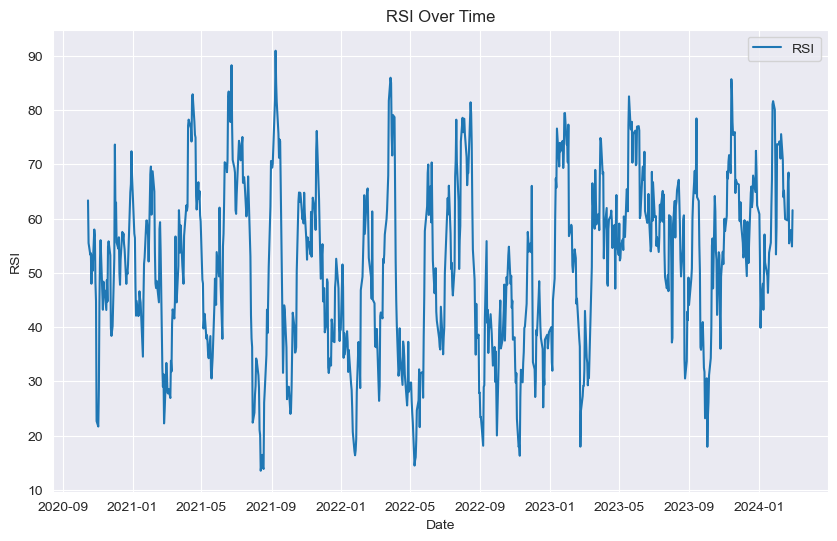

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


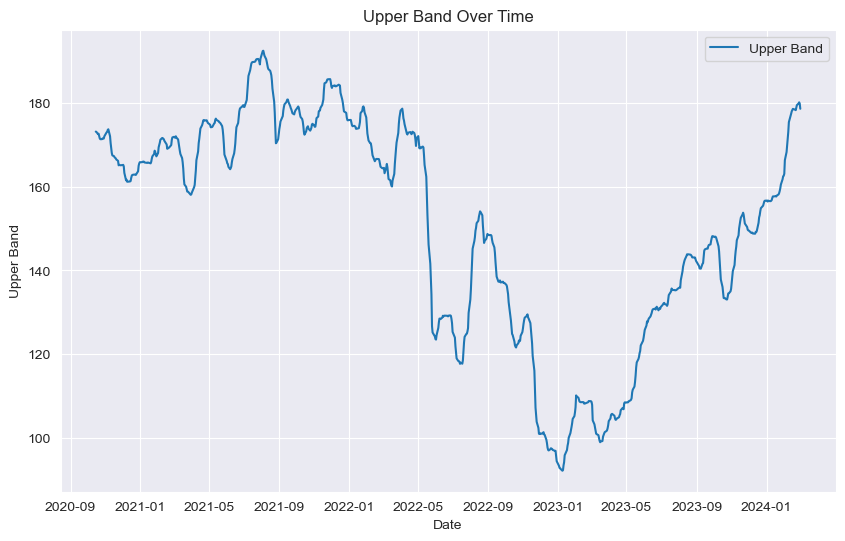

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band')
plt.title('Upper Band Over Time')
plt.xlabel('Date')
plt.ylabel('Upper Band')
plt.legend()
plt.grid(True)
plt.show()


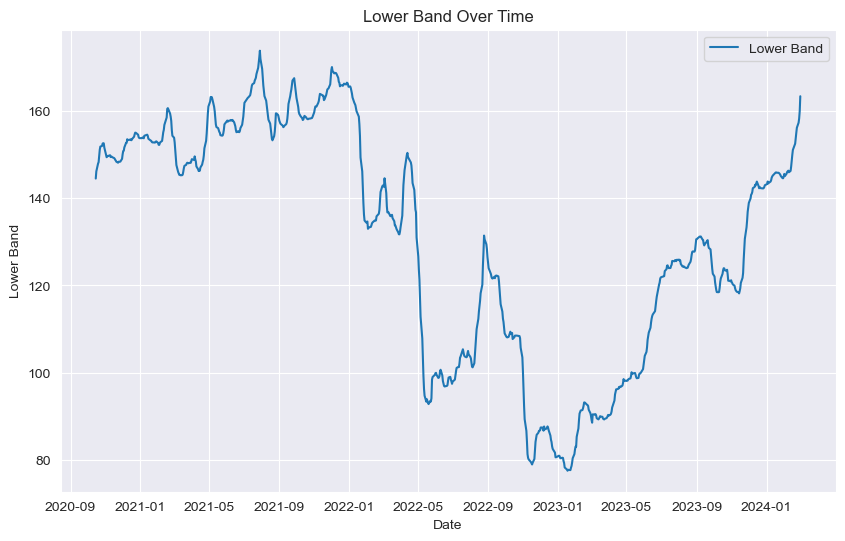

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band')
plt.title('Lower Band Over Time')
plt.xlabel('Date')
plt.ylabel('Lower Band')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Stock Price of Amazon from 1999 to 2022')

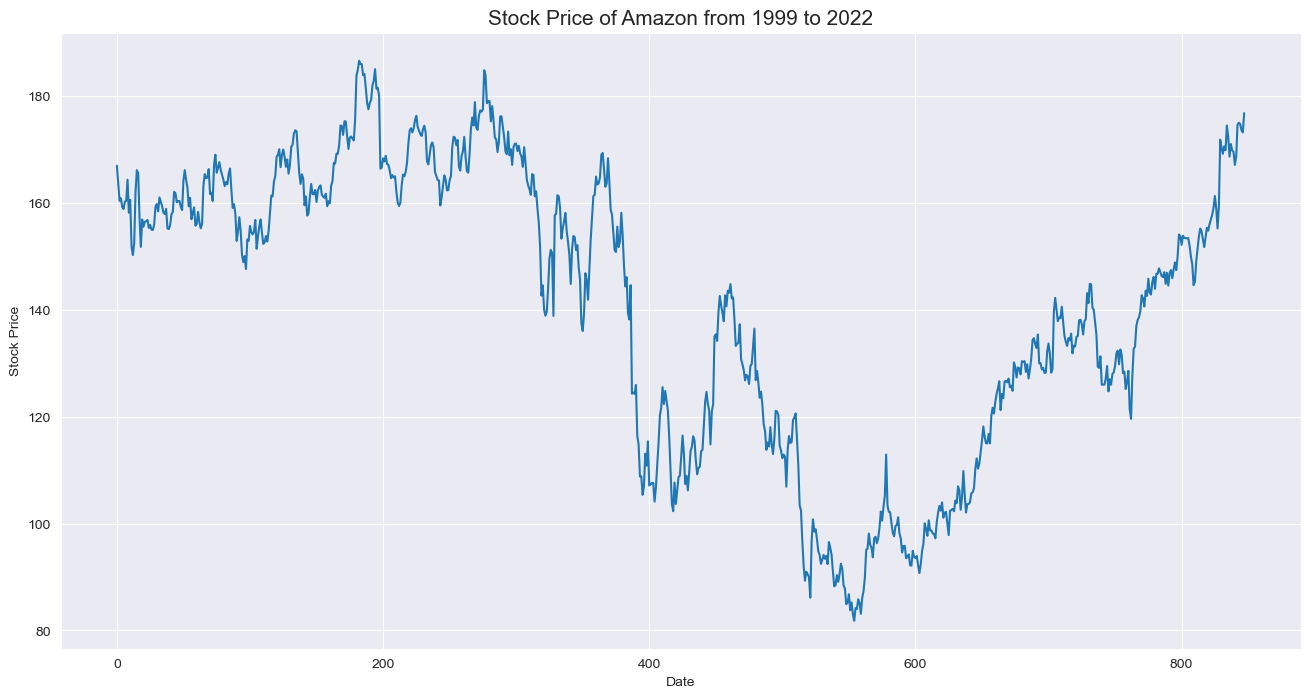

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.xlabel('Date',size=10)
plt.ylabel('Stock Price',size=10)
plt.title('Stock Price of Amazon from 1999 to 2022',size=15)

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title_text="OHLC Chart", title_x=0.5)
fig.show()

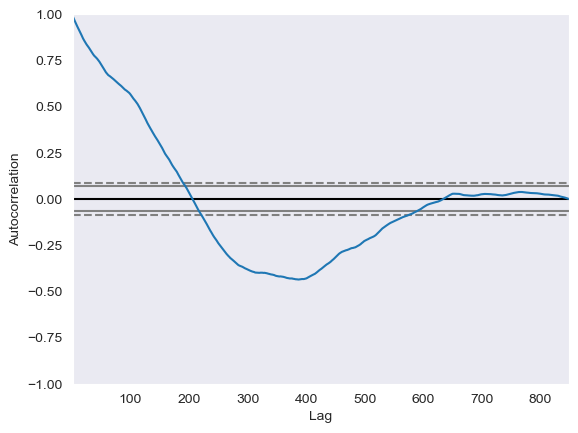

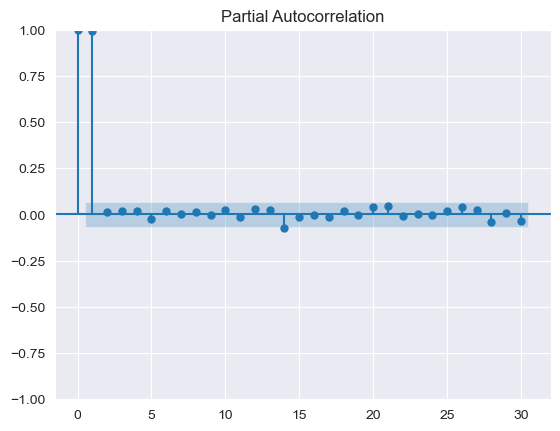

In [20]:
autocorrelation_plot(df['Close'])
plot_pacf(df['Close'])
plt.show()

In [21]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('ADF:', dftest[0])
    print('P-value:', dftest[1])
    print('No. of lags:', dftest[2])
    print('Observation:', dftest[3])
    print('Critical values:')
    for key, val in dftest[4].items():
        print('\t', key, ':', val)
ad_test(df['Close'])

ADF: -1.537749509412785
P-value: 0.5147614691539649
No. of lags: 0
Observation: 847
Critical values:
	 1% : -3.438094071905401
	 5% : -2.8649583643817227
	 10% : -2.568590208277287


In [22]:
data = df['Close']
length = int(len(df['Close']) * 0.90)
print('Length:', length)
print('Data length:',len(data))
train = data.iloc[:length]
print('training shape',train.shape)
test = data.iloc[length:]
print('testing shape',test.shape)

Length: 763
Data length: 848
training shape (763,)
testing shape (85,)


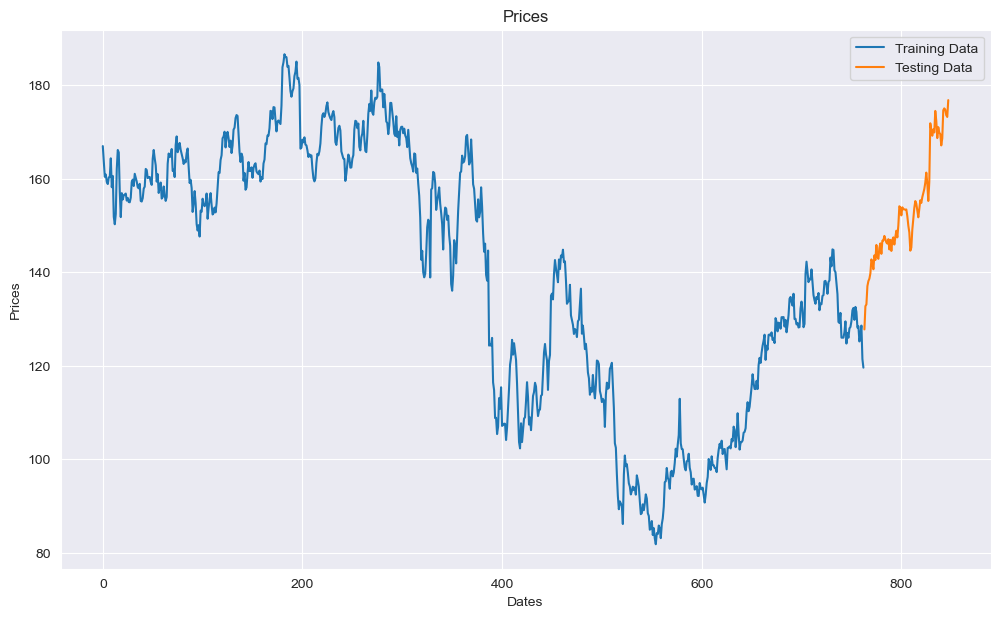

In [23]:
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.legend()

## Model Building (ARIMA)

In [24]:
!pip install pmdarima -q

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3898.333, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3900.332, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3900.332, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3896.636, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3902.332, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.274 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  763
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1947.318
Date:                Tue, 30 Apr 2024   AIC                           3896.636
Time:                        20:56:32   BIC                           3901.272
Sample:                             0   HQIC                          3898.421
                                - 763                                       

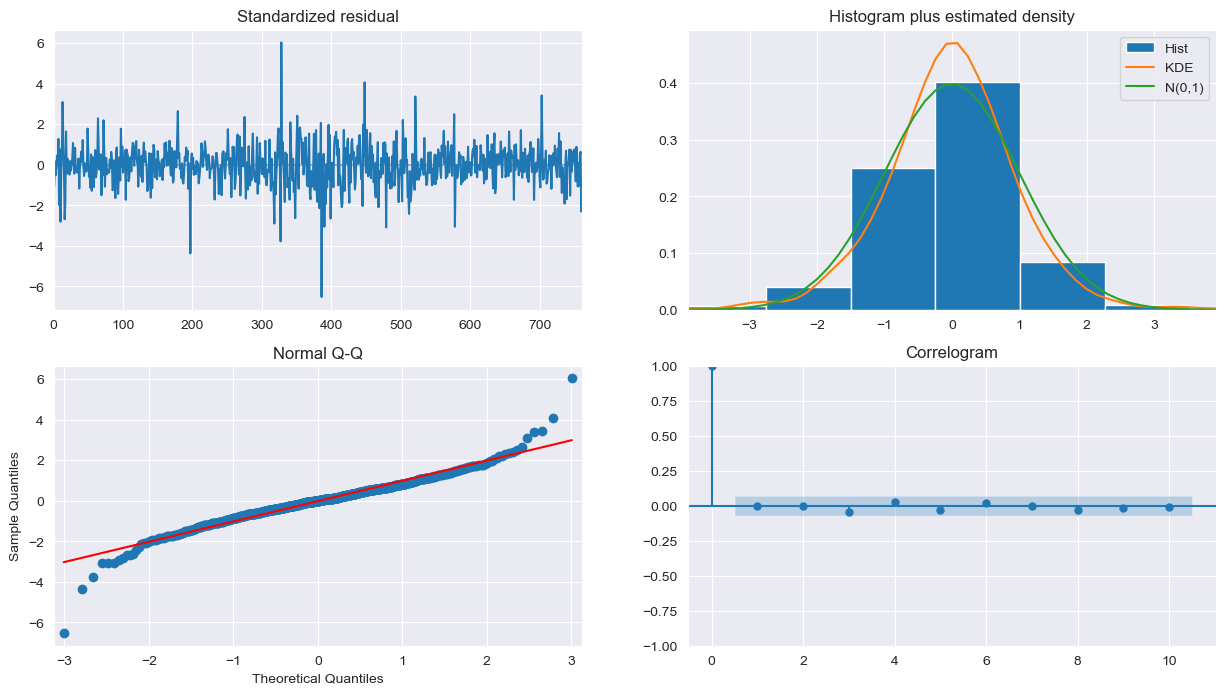

In [25]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [26]:
import statsmodels.api as sm
pred_start = test.index[0]
pred_end = test.index[-1]
model = sm.tsa.statespace.SARIMAX(data,order=(1,1,1))
model_fit = model.fit()
pred = model_fit.predict(start= pred_start , end = pred_end)


<Axes: >

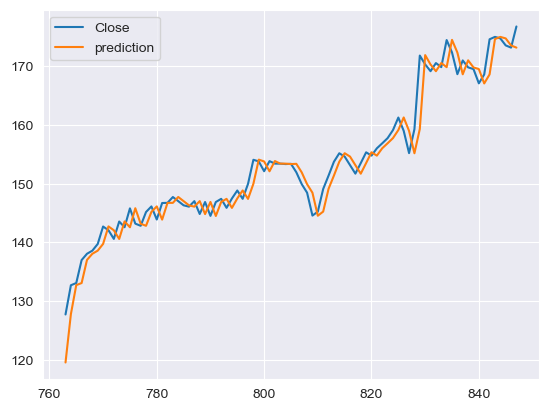

In [27]:
df_sarimax = pd.DataFrame(test)
df_sarimax["prediction"] = pd.Series(pred,index=test.index)
df_sarimax.plot()

In [28]:

# Assuming df_sarimax has columns 'actual' and 'prediction'
actual_values = df_sarimax['Close']
predicted_values = df_sarimax['prediction']

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 1.9350491278088775
Mean Squared Error (MSE): 7.11266013702977
Root Mean Squared Error (RMSE): 2.6669570932112445
R-squared (R2) Score: 0.945586934115556


## Model Building (Multiple Linear Regression Model)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

  # Replace "stock_data.csv" with your dataset file path
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)



Mean Squared Error: 1.279286809041201
R-squared (R2) Score: 0.9981810803360035


In [30]:
df['Direction'] = (df['Close'].diff() > 0).astype(int)

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Upper_Band,Lower_Band,Direction
0,2020-10-15,164.600494,167.794006,164.000000,166.932495,166.932495,104468000,161.061539,127.475924,63.334779,173.154703,144.515496,0
1,2020-10-16,168.161499,169.983002,158.000000,163.635498,163.635498,129488000,161.109249,127.819599,55.480376,173.096381,146.162818,0
2,2020-10-19,164.980499,166.449997,159.636993,160.360504,160.360504,104472000,161.148999,128.152659,53.327993,172.555240,147.937660,0
3,2020-10-20,161.113998,163.300003,159.600494,160.850494,160.850494,90194000,161.217849,128.481192,53.622665,172.646160,148.286840,1
4,2020-10-21,160.625000,161.694000,158.000000,159.246994,159.246994,91854000,161.322119,128.800712,47.986552,172.094424,149.763975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59715200,158.416399,138.562850,55.426634,179.467689,156.178307,1
844,2024-02-26,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,158.961399,138.903400,57.875973,179.878763,157.328233,0
845,2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31141700,159.455399,139.220150,57.814164,180.140937,158.294060,0
846,2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,159.970199,139.525050,54.854199,179.850458,160.000538,0


## Model Building(Logistic Regression)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame containing the dataset
# Features: 'Open', 'High', 'Low', 'Adj Close', 'Volume'
# Target variable: 'Direction' (1 for increase, 0 for decrease)

# Step 1: Define the target variable 'Direction' based on the change in 'Close' price
df['Direction'] = (df['Close'].diff() > 0).astype(int)

# Step 2: Select features and target variable
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Direction']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.5176470588235295
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.52      1.00      0.68        88

    accuracy                           0.52       170
   macro avg       0.26      0.50      0.34       170
weighted avg       0.27      0.52      0.35       170



## Model Building(KNN)

In [33]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Assuming 'df' is your DataFrame containing the dataset
# 'Close' column represents the closing prices of Amazon stock

# Define the feature
feature = ['Close']

# Separate features
X = df[feature]

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')

# Fit the model to the data
knn.fit(X)

# Calculate distances and indices of the k-neighbors of each point
distances, indices = knn.kneighbors(X)

# Calculate the distance to the kth nearest neighbor for each point
# This can be used as a measure of outlier-ness
outlier_scores = distances[:, -1]

# Sort the outlier scores in descending order
sorted_indices = outlier_scores.argsort()[::-1]

# Print the indices of the top 10 outliers
print("Indices of top 10 outliers:")
print(sorted_indices[:10])


Indices of top 10 outliers:
[554 182 195 196 187 197 553 183 184 561]


## KMeans Clustering

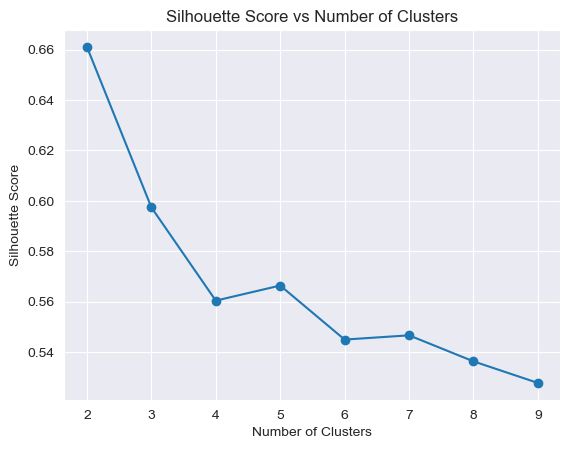

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'df'
# Make sure 'Volume' is in a column in your DataFrame

# Extract the 'Volume' column
volume_data = df[['Volume']]

# Normalize the data (optional but recommended for K-Means)
volume_data_normalized = (volume_data - volume_data.mean()) / volume_data.std()

# Define a range of cluster numbers to evaluate (replace with your desired range)
cluster_range = range(2, 10)  # Experiment with different ranges

# Create a list to store silhouette scores for each k value
silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for k in cluster_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(volume_data_normalized)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(volume_data_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

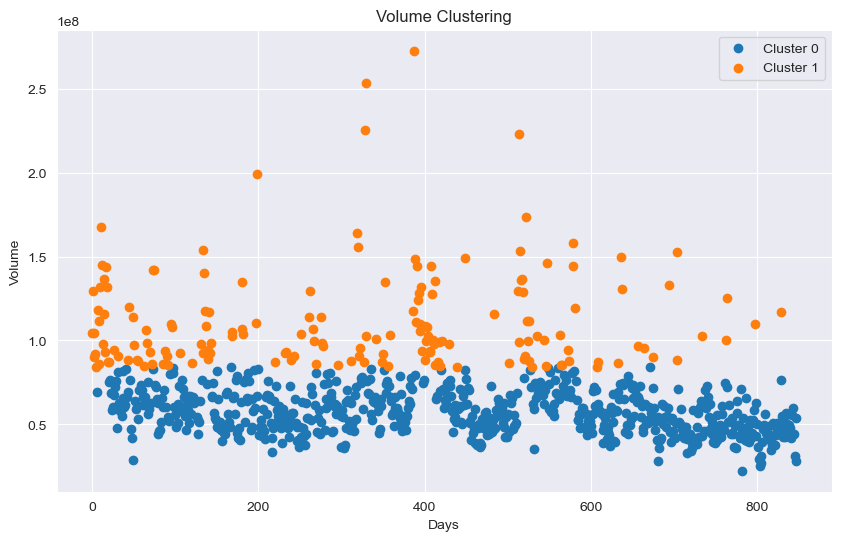

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'df'
# Make sure 'Volume' is in a column in your DataFrame

# Extract the 'Volume' column
volume_data = df[['Volume']]

# Normalize the data (optional but recommended for K-Means)
volume_data_normalized = (volume_data - volume_data.mean()) / volume_data.std()

# Choose the number of clusters (you can experiment with different values)
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(volume_data_normalized)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Volume_Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    plt.scatter(df[df['Volume_Cluster'] == cluster_label].index,
                df[df['Volume_Cluster'] == cluster_label]['Volume'],
                label=f'Cluster {cluster_label}')
plt.title('Volume Clustering')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()
